#### Testing powers

In [1]:
# Calling libraries:
from __future__ import division
%matplotlib inline
import numpy as np, time, matplotlib.pyplot as plt, math, pandas, numpy.random as npr
from pylab import plot, show, legend
from time import time
from scipy.stats import *
import scipy
from Ricker_functions import *

In [2]:
x_0 = 5; T = 200
r, σ, ϕ = np.exp(2.8), 0.5, 3
θ = np.asarray([r, σ, ϕ])

X, Y = simulate_data(x_0, T, θ)

### Run segmented MCMC:

In [34]:
N_MCMC = 1_000
N_PF = 500
scale = np.asarray([2e-1, 2e-1, 2e-1])/4
chunk_size = 50
power = 4

start = time()
θ_chains_apprx = chunked_pMCMC(x_0, Y, θ, N_MCMC, scale, N_PF, chunk_size, power, adapt=True)
print(round((time()-start)/60, 2), 'minutes')

100%|██████████| 1000/1000 [00:10<00:00, 99.96it/s]

0.66 minutes


In [35]:
start = time()
θ_chains_true = chunked_pMCMC_true(Y, X, θ, N_MCMC, scale, N_PF, chunk_size, power, adapt=True)
print(round((time() - start)/60, 2), 'minutes')

100%|██████████| 1000/1000 [00:09<00:00, 101.86it/s]

0.65 minutes


#### Traceplots for chunk posteriors:

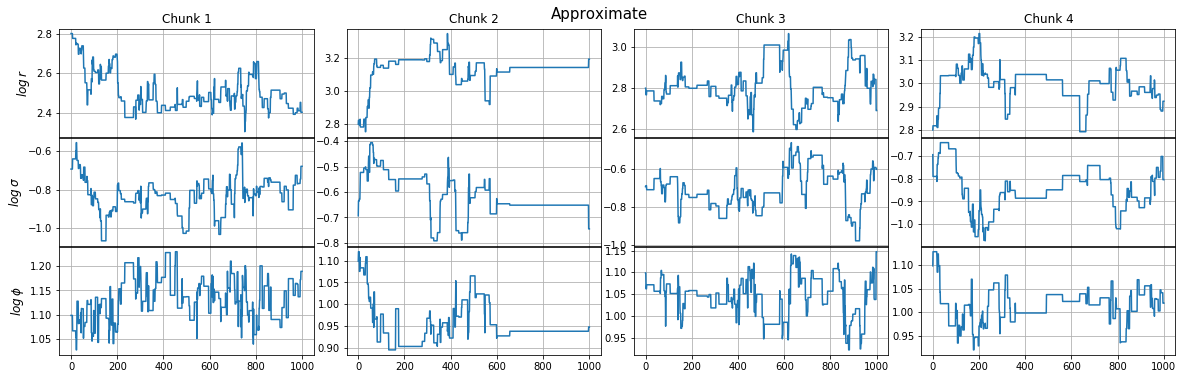

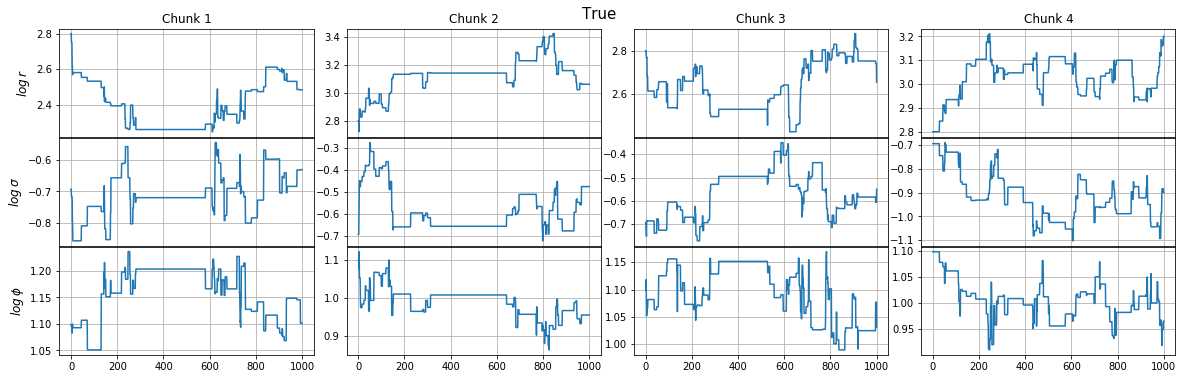

In [36]:
params = [r"$log \, r$", r"$log \, \sigma$", r"$log \, \phi$"]
plt.figure(figsize=(20,6))
for j in range(3) :
    for i in range(np.shape(θ_chains_apprx)[0]) :
        plt.subplot(3,4,4*j+i+1) 
        plt.plot(np.log(θ_chains_apprx[i,:,j]))
        plt.grid(True)
        plt.suptitle("Approximate", fontsize=15, y=0.93)
        if j == 0 : plt.title("Chunk "+str(i+1))
        if i == 0 : plt.ylabel(params[j], fontsize=12)
        if j < 2 : plt.xticks(alpha=0)
    plt.subplots_adjust(hspace=0.01, wspace=0.13)
plt.show()
    
plt.figure(figsize=(20,6))
for j in range(3) :
    for i in range(np.shape(θ_chains_true)[0]) :
        plt.subplot(3,4,4*j+i+1) 
        plt.plot(np.log(θ_chains_true[i,:,j]))
        plt.grid(True)
        plt.suptitle("True", fontsize=15, y=0.93)
        if j == 0 : plt.title("Chunk "+str(i+1))
        if i == 0 : plt.ylabel(params[j], fontsize=12)
        if j < 2 : plt.xticks(alpha=0)
    plt.subplots_adjust(hspace=0.01, wspace=0.13)
plt.show()

#### Density estimates for chunk posteriors:

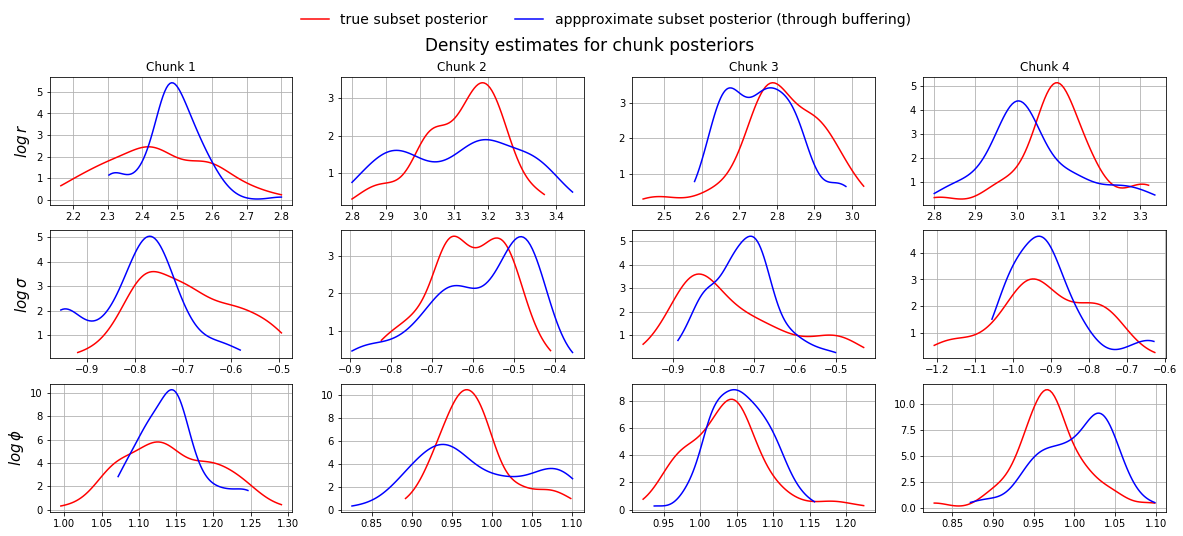

In [33]:
plt.figure(figsize=(20,8))

thin = 10
for j in range(3) :
    for i in range(np.shape(θ_chains_true)[0]) :
        plt.subplot(3,4,4*j+i+1) 
        x_vals = np.linspace(start=np.min(np.log(θ_chains_true[i,::thin,j])), 
                                 stop=np.max(np.log(θ_chains_true[i,::thin,j])), num=100)
        plt.plot(x_vals, gaussian_kde(np.log(θ_chains_true[i,::thin,j])) (x_vals), "red", 
                 label="true subset posterior") 
        x_vals = np.linspace(start=np.min(np.log(θ_chains_apprx[i,::thin,j])), 
                                 stop=np.max(np.log(θ_chains_apprx[i,::thin,j])), num=100)
        plt.plot(x_vals, gaussian_kde(np.log(θ_chains_apprx[i,::thin,j])) (x_vals), "blue",
                label="appproximate subset posterior (through buffering)") 
        plt.grid(True)
        if i == 0 : plt.ylabel(params[j], fontsize=15)
        if j == 0 : plt.title("Chunk "+str(i+1))
    if j == 0 : plt.legend(ncol=2, bbox_to_anchor=(0,1.6), fontsize=14, frameon=False)
plt.suptitle("Density estimates for chunk posteriors", x=0.5, y=0.95, fontsize=17);